In [44]:
# Import dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [45]:
# Read csv file 
cdc_df = pd.read_csv('cdc.codes/cdc.csv')
full_data_2017 = pd.read_csv('cdc.codes/2017_code_data.csv')
full_data_2017
adult_data_2017 = pd.read_csv('cdc.codes/samadult.csv')
adult_data_2017

,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,...,MBO_PRO1,YTQU_YG1,YTQ_BTY1,YTQ_MDY1,YTQU_TA1,YTQ_BTT1,YTQ_MDT1,YTQU_QG1,YTQ_BTQ1,YTQ_MDQ1
0,1,1,3,1,5829.3,5044,2,12,4,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
1,1,1,9,1,2752.4,3770,1,12,7,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
2,2,1,11,1,14902.0,17305,1,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
3,1,1,15,1,8531.8,7383,2,12,5,1,...,2,1,1.0,1.0,1,1.0,2.0,2,NaN,NaN
4,1,1,18,1,5477.2,8314,1,0,1,1,...,2,1,1.0,1.0,2,NaN,NaN,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26737,2,1,58880,4,7030.2,6082,2,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
26738,1,1,58881,4,6261.6,5557,2,12,4,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
26739,1,1,58882,4,7818.1,7603,2,12,1,2,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN
26740,1,1,58883,4,8691.9,7833,1,12,1,1,...,2,2,NaN,NaN,2,NaN,NaN,2,NaN,NaN


In [46]:
# Reorganize the columns
cdc_df = cdc_df[['Code', 'Description', 'Category']]
cdc_df


,Code,Description,Category
0,URBRRL,Geography (urban vs suburban vs rural),Demographics
1,REGION,"US Geographic Region (SE, NW)",Demographics
2,SEX_A,Sex,Demographics
3,HISP_A,Hispanic ethnicity,Demographics
4,HISPALLP_A,Hispanic and other ethnicity (mixed),Demographics
...,...,...,...
69,MODFREQW_A,moderate physical activity (Y/N) / frequency,Lifestyle / Chronic Disease Indicators
70,VIGFREQW_A,vigorous physical activity (Y/N) / frequency,Lifestyle / Chronic Disease Indicators
71,PA18_05R_A,met 2018 physical activity guidelines = 150+ m...,Lifestyle / Chronic Disease Indicators
72,SLPREST_A,"sleep quality (""over past 30 days, how often d...",Lifestyle / Chronic Disease Indicators


In [47]:
# Removing spaces in column names
adult_data_2017.columns = adult_data_2017.columns.to_series().apply(lambda x:x.strip())


In [48]:
# Selecting the columns we need and adding them to a dataframe
filtered_data_2017 = adult_data_2017 [["AFLHCA17", "REGION", "SEX", "HISPAN_I","RACERPI2",
                              "R_MARITL", "HYPEV", "CHLEV", "CHDEV",
                              "EPHEV", "AASMEV", "CANEV", "DIBEV1",
                              "DIBTYPE", "EPILEP1", "ARTH1", "HRAIDNOW",
                              "AVISION", "AHSTATYR", "PAINLMT", "FLWALK",
                              "ALCHRONR", "SMKSTAT2", "MODFREQW", "ALCSTAT",
                              "AHCPLROU", "AWORPAY", "ADNLONG2", "AHCSYR1",
                              "AHERNOY2", "AHCHYR", "ASRGYR", "AMDLONGR",
                              "AEXCHNG", "ASICPUSE", "ASISIM", "ASISIF",
                              "ASISLPFL", "MBO_SPR1", "AWEBUSE"]]
filtered_data_2017.head()

,AFLHCA17,REGION,SEX,HISPAN_I,RACERPI2,R_MARITL,HYPEV,CHLEV,CHDEV,EPHEV,...,AHCHYR,ASRGYR,AMDLONGR,AEXCHNG,ASICPUSE,ASISIM,ASISIF,ASISLPFL,MBO_SPR1,AWEBUSE
0,NaN,3,2,12,1,4,1,1,2,2,...,2,2,2,NaN,4,NaN,2.0,0,2,1
1,NaN,2,1,12,1,7,2,2,2,2,...,2,2,2,2.0,4,2.0,NaN,6,2,1
2,2.0,2,1,12,1,1,2,2,2,2,...,2,2,1,2.0,3,2.0,NaN,7,2,1
3,NaN,2,2,12,1,5,2,2,2,2,...,2,2,1,NaN,4,NaN,2.0,0,1,1
4,NaN,3,1,0,1,1,2,2,2,2,...,2,2,2,2.0,4,2.0,NaN,0,1,1


In [49]:
filtered_data_2017 = filtered_data_2017.rename(columns = {"AFLHCA17" : "Suffering from Dep/Anx",
                                                          "REGION" : "Geographic Region", "SEX" : "SEX",
                                                          "HISPAN_I" : "Hispanic Origin",
                                                          "RACERPI2" : "Race", "R_MARITL" : "Marital Status",
                                                          "HYPEV" : "Hypertension", "CHLEV" : "Cholesterol",
                                                          "CHDEV" : "Coronary Heart Disease", "EPHEV" : "emphysema",
                                                          "AASMEV" : "Asthma", "CANEV" : "Cancer",
                                                          "DIBEV1" : "Diabetes", "DIBTYPE" : "Diabetes Type",
                                                          "EPILEP1" : "Epilepsy", "ARTH1" : "Arthritis",
                                                          "HRAIDNOW" : "Usin a Hearing Aid",
                                                          "AVISION" : "Trouble seeing W/Glasses/Lenses",
                                                          "AHSTATYR" : "Health Status (Past 12m)",
                                                          "PAINLMT" : "Pain Severity (Past 6m)",
                                                          "FLWALK" : "Mobility/Ability to Walk Unaided",
                                                          "ALCHRONR" : "Overall Functional Limitation",
                                                          "SMKSTAT2" : "Smoking Status",
                                                          "MODFREQW" : "Moderate Activity/W",
                                                          "ALCSTAT" : "Alcohol Drinking Status",
                                                          "AHCPLROU" : "Usual Place for Routine/Preventive Care",
                                                          "AWORPAY" : "Medical Bills Pay Worry",
                                                          "ADNLONG2" : "Time Since Dentist's Last Visit",
                                                          "AHCSYR1" : "Seen/Talked With Mental Specialist (Past 12m)",
                                                          "AHERNOY2" : "ER/ED Freq. (Past 12m)",
                                                          "AHCHYR" : "Home Care Received (Past 12m)",
                                                          "ASRGYR" : "Surgery/Surgical Procedures (Past 12m)",
                                                          "AMDLONGR" : "Time Since Last Seen/Talked to a Health Pro",
                                                          "AEXCHNG" : "Looked into Buying Ins. through Healthcare.gov/Health Ins. MP",
                                                          "ASICPUSE" : "Computer Use Freq.", "ASISIM" : "Sexual Orientation (M)",
                                                          "ASISIF" : "Sexual Orientation (F)",
                                                          "ASISLPFL" : "Difficutly Falling Asleep (Past W)",
                                                          "MBO_SPR1" : "Used Spiritual Meditation (Past 12m)",
                                                          "AWEBUSE" : "Internet use",
                                                       })
filtered_data_2017.head()

,Suffering from Dep/Anx,Geographic Region,SEX,Hispanic Origin,Race,Marital Status,Hypertension,Cholesterol,Coronary Heart Disease,emphysema,...,Home Care Received (Past 12m),Surgery/Surgical Procedures (Past 12m),Time Since Last Seen/Talked to a Health Pro,Looked into Buying Ins. through Healthcare.gov/Health Ins. MP,Computer Use Freq.,Sexual Orientation (M),Sexual Orientation (F),Difficutly Falling Asleep (Past W),Used Spiritual Meditation (Past 12m),Internet use
0,NaN,3,2,12,1,4,1,1,2,2,...,2,2,2,NaN,4,NaN,2.0,0,2,1
1,NaN,2,1,12,1,7,2,2,2,2,...,2,2,2,2.0,4,2.0,NaN,6,2,1
2,2.0,2,1,12,1,1,2,2,2,2,...,2,2,1,2.0,3,2.0,NaN,7,2,1
3,NaN,2,2,12,1,5,2,2,2,2,...,2,2,1,NaN,4,NaN,2.0,0,1,1
4,NaN,3,1,0,1,1,2,2,2,2,...,2,2,2,2.0,4,2.0,NaN,0,1,1


In [50]:
# Add correlation function to DataSet
filtered_data_2017.corr()


,Suffering from Dep/Anx,Geographic Region,SEX,Hispanic Origin,Race,Marital Status,Hypertension,Cholesterol,Coronary Heart Disease,emphysema,...,Home Care Received (Past 12m),Surgery/Surgical Procedures (Past 12m),Time Since Last Seen/Talked to a Health Pro,Looked into Buying Ins. through Healthcare.gov/Health Ins. MP,Computer Use Freq.,Sexual Orientation (M),Sexual Orientation (F),Difficutly Falling Asleep (Past W),Used Spiritual Meditation (Past 12m),Internet use
Suffering from Dep/Anx,1.000000,0.000955,-0.005242,-0.011779,0.016701,-0.031529,-0.016992,-0.007739,-0.016819,0.036561,...,0.008832,0.027631,0.031850,0.020245,-0.000967,-0.006924,0.013164,-0.000201,0.028262,0.024834
Geographic Region,0.000955,1.000000,-0.003476,-0.127433,0.102981,-0.019466,0.014514,0.024657,0.008879,0.013381,...,0.007307,0.002498,0.030719,-0.014825,-0.002422,-0.019254,-0.010121,-0.009182,-0.017050,-0.013610
SEX,-0.005242,-0.003476,1.000000,-0.010284,0.001625,0.005377,0.014775,0.011847,0.039146,0.010110,...,-0.007699,-0.008333,-0.103202,-0.001529,0.013273,NaN,NaN,0.021530,-0.004031,0.007057
Hispanic Origin,-0.011779,-0.127433,-0.010284,1.000000,0.030976,-0.022320,-0.065513,-0.038840,-0.017371,-0.017670,...,-0.004929,-0.024482,-0.060030,-0.000113,0.116502,0.004063,-0.013656,0.004872,-0.001790,-0.022667
Race,0.016701,0.102981,0.001625,0.030976,1.000000,0.055652,0.012930,0.035775,0.008747,0.008144,...,0.009636,0.027348,0.029754,0.012538,-0.015047,0.010015,0.023037,0.014644,0.013445,0.021608
Marital Status,-0.031529,-0.019466,0.005377,-0.022320,0.055652,1.000000,0.077502,0.096274,0.027240,0.001262,...,0.002316,0.032468,0.070647,0.010165,-0.015612,0.015558,0.041226,0.021344,0.007041,0.012614
Hypertension,-0.016992,0.014514,0.014775,-0.065513,0.012930,0.077502,1.000000,0.261508,0.161203,0.096485,...,0.039636,0.050745,0.141993,0.005745,0.143763,-0.004863,0.002111,-0.007352,0.006211,-0.054297
Cholesterol,-0.007739,0.024657,0.011847,-0.038840,0.035775,0.096274,0.261508,1.000000,0.161516,0.126478,...,0.023799,0.040870,0.114271,0.011535,0.052158,0.015676,0.026461,0.012565,0.025287,-0.012937
Coronary Heart Disease,-0.016819,0.008879,0.039146,-0.017371,0.008747,0.027240,0.161203,0.161516,1.000000,0.188694,...,0.017122,0.027067,0.031724,0.004995,0.040095,0.003385,0.020957,0.015760,0.010491,-0.011202
emphysema,0.036561,0.013381,0.010110,-0.017670,0.008144,0.001262,0.096485,0.126478,0.188694,1.000000,...,0.012326,0.030645,0.028183,0.007866,0.041979,0.005023,0.016929,-0.001278,0.004364,-0.012006


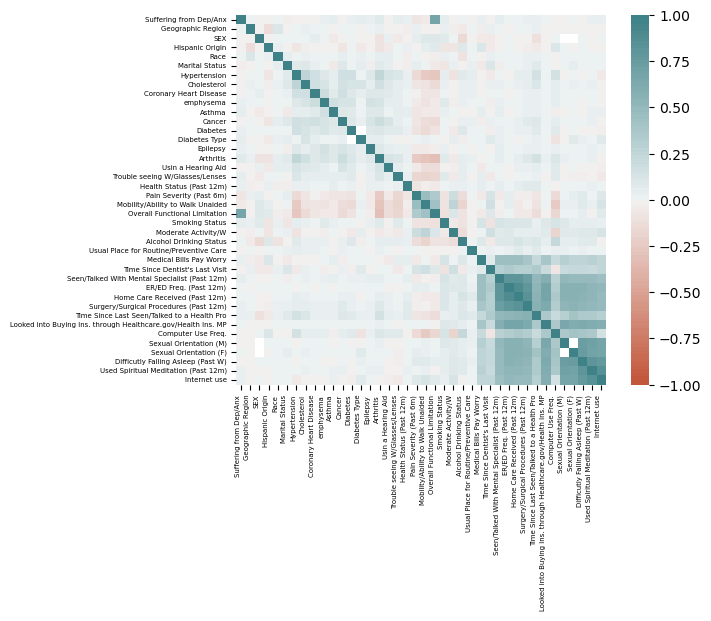

In [51]:
# Change data name 
df_17 = filtered_data_2017
corr = df_17.corr()

# plot a heat matrix
ax = sns.heatmap(corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, sep=1, n=100, l=50),
    square=True,
    xticklabels=True,
    yticklabels=True)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=5);

ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize=5,
    horizontalalignment='right'
  
);


In [ ]:
#The histogram helped us to see the potential correlation among other 
#chronic conditions an those that are not related. The green color
#represents signifcant correlation while the red negative correlation

In [52]:
# Create a new Data Frame with only Region and Sex
region_and_gender = df_17.loc[:,["Geographic Region", "SEX"]].head()
region_and_gender

,Geographic Region,SEX
0,3,2
1,2,1
2,2,1
3,2,2
4,3,1


In [53]:
# Create a dictionary for sex 
renamed_gen = {1: "Male",
               2: "Female"}
# Create a dictionary for Geographic Region
renamed_gr = {1: "Northeast",
              2: "Midwest",
              3: "South",
              4: "West"}

In [54]:
# Rename column "SEX" for Female and Male
df_17["SEX"] = df_17["SEX"].apply(lambda x: renamed_gen[x])

In [55]:
# Rename column "Geographic Region" 
df_17["Geographic Region"] = df_17["Geographic Region"].apply(lambda x: renamed_gr[x])

In [56]:
# Print Data Frame
df_17

,Suffering from Dep/Anx,Geographic Region,SEX,Hispanic Origin,Race,Marital Status,Hypertension,Cholesterol,Coronary Heart Disease,emphysema,...,Home Care Received (Past 12m),Surgery/Surgical Procedures (Past 12m),Time Since Last Seen/Talked to a Health Pro,Looked into Buying Ins. through Healthcare.gov/Health Ins. MP,Computer Use Freq.,Sexual Orientation (M),Sexual Orientation (F),Difficutly Falling Asleep (Past W),Used Spiritual Meditation (Past 12m),Internet use
0,NaN,South,Female,12,1,4,1,1,2,2,...,2,2,2,NaN,4,NaN,2.0,0,2,1
1,NaN,Midwest,Male,12,1,7,2,2,2,2,...,2,2,2,2.0,4,2.0,NaN,6,2,1
2,2.0,Midwest,Male,12,1,1,2,2,2,2,...,2,2,1,2.0,3,2.0,NaN,7,2,1
3,NaN,Midwest,Female,12,1,5,2,2,2,2,...,2,2,1,NaN,4,NaN,2.0,0,1,1
4,NaN,South,Male,0,1,1,2,2,2,2,...,2,2,2,2.0,4,2.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26737,2.0,West,Female,12,1,1,2,1,2,2,...,2,2,1,NaN,4,NaN,2.0,1,2,1
26738,2.0,South,Female,12,1,4,1,2,2,2,...,2,2,1,NaN,4,NaN,2.0,2,2,1
26739,NaN,South,Female,12,2,1,1,1,2,2,...,2,2,1,NaN,2,NaN,2.0,0,2,1
26740,NaN,Northeast,Male,12,1,1,1,1,2,2,...,2,2,1,NaN,4,2.0,NaN,3,2,1


In [57]:
# Drop all NAN from selected column
anx_df = df_17[~(df_17['Suffering from Dep/Anx'].isna())]

In [58]:
# Converting column from float to int
anx_df['Suffering from Dep/Anx'] = anx_df['Suffering from Dep/Anx'].astype(int)

In [59]:
# See how many values are in the column
anx_df['Suffering from Dep/Anx'].unique()

array([2, 8, 1, 7, 9])

In [60]:
# Create a dictionary for column
renamed_anx = {1: "Yes",
               2: "No"}

In [61]:
# Adding the changes from the dictionary to the data frame
anx_df['Suffering from Dep/Anx'] = anx_df['Suffering from Dep/Anx'].map(renamed_anx)

anx_df = anx_df[~(anx_df['Suffering from Dep/Anx'].isna())]

In [62]:
# Get the the unique values from column
anx_df['Suffering from Dep/Anx'].unique()

array(['No', 'Yes'], dtype=object)

In [63]:
# Print Data Frame
anx_df

,Suffering from Dep/Anx,Geographic Region,SEX,Hispanic Origin,Race,Marital Status,Hypertension,Cholesterol,Coronary Heart Disease,emphysema,...,Home Care Received (Past 12m),Surgery/Surgical Procedures (Past 12m),Time Since Last Seen/Talked to a Health Pro,Looked into Buying Ins. through Healthcare.gov/Health Ins. MP,Computer Use Freq.,Sexual Orientation (M),Sexual Orientation (F),Difficutly Falling Asleep (Past W),Used Spiritual Meditation (Past 12m),Internet use
2,No,Midwest,Male,12,1,1,2,2,2,2,...,2,2,1,2.0,3,2.0,NaN,7,2,1
7,No,South,Female,12,3,5,2,1,2,2,...,2,2,1,2.0,1,NaN,2.0,3,2,2
8,No,Midwest,Male,12,1,1,1,1,1,2,...,2,1,1,NaN,1,2.0,NaN,0,2,2
13,No,Midwest,Male,12,1,1,1,1,1,2,...,2,1,1,1.0,3,2.0,NaN,0,2,1
14,No,West,Male,12,1,8,2,2,2,2,...,2,2,3,2.0,2,2.0,NaN,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26733,No,South,Female,12,2,4,1,1,2,2,...,2,2,1,NaN,3,NaN,2.0,1,1,1
26736,No,South,Male,12,1,5,2,1,2,2,...,1,2,1,2.0,4,2.0,NaN,7,1,1
26737,No,West,Female,12,1,1,2,1,2,2,...,2,2,1,NaN,4,NaN,2.0,1,2,1
26738,No,South,Female,12,1,4,1,2,2,2,...,2,2,1,NaN,4,NaN,2.0,2,2,1


In [70]:
# Create Data frame with the selected columns 
bar_df = anx_df[['Suffering from Dep/Anx','Geographic Region','SEX']]

<Axes: title={'center': 'Not Depressed'}, xlabel='Geographic Region'>

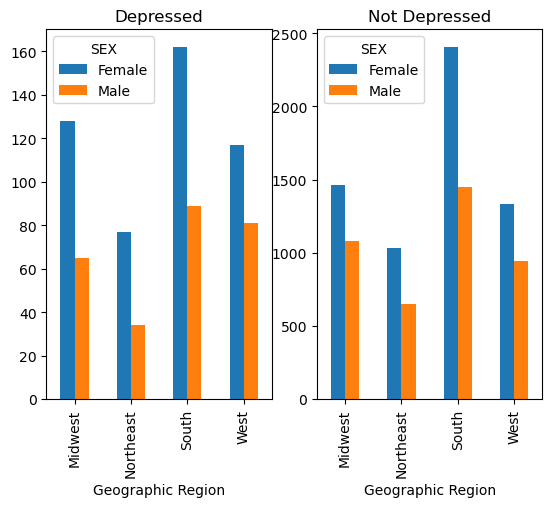

In [71]:
# Group 

fig,ax = plt.subplots(1,2)

bar_df.loc[bar_df['Suffering from Dep/Anx'] == 'Yes'].groupby('SEX')['Geographic Region']\
                      .value_counts().unstack().T.plot.bar( ax=ax[0], title= 'Depressed' )


bar_df.loc[bar_df['Suffering from Dep/Anx'] == 'No'].groupby('SEX')['Geographic Region']\
                      .value_counts().unstack().T.plot.bar( ax=ax[1], title='Not Depressed')

In [ ]:
# We thought relevant to see the number of people with depression 
# and those without depression by gender and region.
# data was group(ed) by based on those to values.

In [66]:
# Count 'Yes' and 'No' from Suffering from Dep/Anx column
count_df = anx_df.groupby(['Geographic Region','Suffering from Dep/Anx'])['SEX'].count().unstack()
count_df['Yes']

Geographic Region
Midwest      193
Northeast    111
South        251
West         198
Name: Yes, dtype: int64

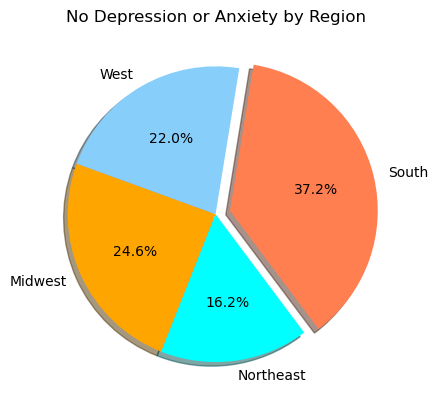

In [67]:
# Plot pie chart from people without depression by region
labels = count_df.index
sizes = count_df["No"]
colors = ["orange", "cyan", "coral", "lightskyblue"]
explode = (0, 0, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('Percentage of No Depression/Anxiety by Region')
plt.show()


In [ ]:
# The pie chart helped us to visualize people without depression
# by region, using group by for those who answered 'No'

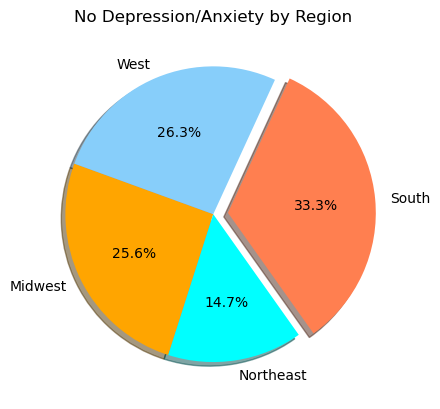

In [68]:
# Plot pie chart from people with depression by Region
labels = count_df.index
sizes = count_df["Yes"]
colors = ["orange", "cyan", "coral", "lightskyblue"]
explode = (0, 0, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title('Percentage of Depression/Anxiety by Region')
plt.show()

In [ ]:
# As the previous pie chart we plot answers 'Yes' in order to compare
# both answers by Rregion.